**Sales Channel Prediction Case Study:**<br>

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . <br>


The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
## Importing necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Dataset
data=pd.read_csv('Advertising.csv')
data_copy=data # Saving a copy of original dataset
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
## checking for datatypes in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
## checking for null values
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

- dataset has 5 columns and 200 rows
- will drop 'Unnamed: 0' column as it stores only indexes.
- we have 3 features and 1 target. 
- All columns has numerical data
- We do not have any null values on our dataset

In [6]:
## Dropping the 'Unnamed: 0' column
data=data.drop('Unnamed: 0',axis=1)
data.shape

(200, 4)

In [7]:
## Checking the statistical summery
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- 'TV' and 'radio' look normally distributed and may not have outliers
- 'newspaper' looks skewed and may also has outliers

## Checking the skewness and outliers

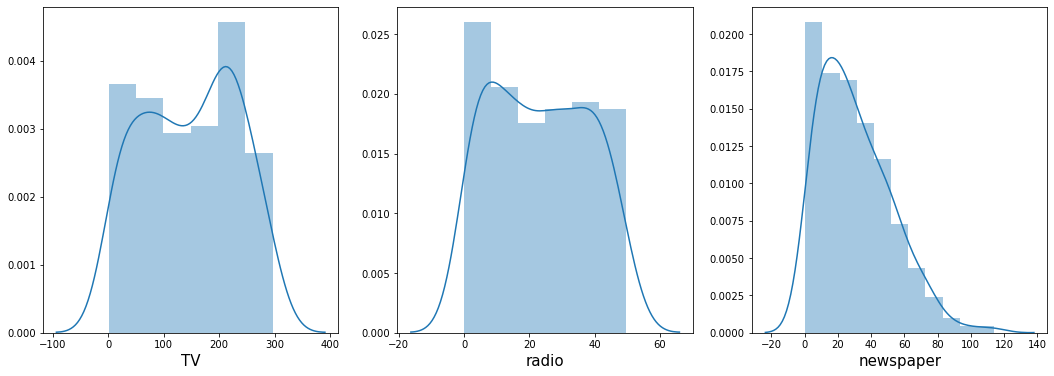

In [8]:
plt.figure(figsize=(18,6))
plot_number=1

for i in data:
    if plot_number<4:
        ax=plt.subplot(1,3,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plot_number+=1
    

In [9]:
data.drop('sales',axis=1).skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

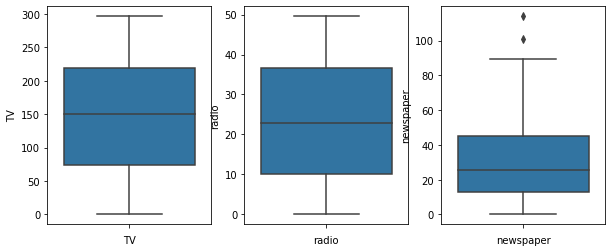

In [10]:
plt.figure(figsize=(10,4))
plotnumber=1

for column in data:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

- 'newspaper' feature is skewed and has outliers

In [11]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [12]:
out_news=Q3.newspaper+(1.5*IQR.newspaper)
out_news

93.625

In [13]:
index=np.where(data['newspaper']>(Q3.newspaper+(1.5*IQR.newspaper)))
data=data.drop(data.index[index])
print('shape: ',data.shape)
data.reset_index().head()

shape:  (198, 4)


,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


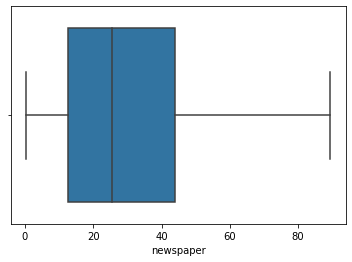

In [14]:
sns.boxplot(data['newspaper'])

outliers have been successfully removed

In [15]:
data['newspaper'].skew()

0.650111551724088

In [16]:
## Removing the skewness in 'newspaper' using square root transformation
data['newspaper']=np.sqrt(data['newspaper'])

In [17]:
data.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

**Now, we have successfully removed the skewness and outliers**

## Checking the relation between features and label

In [18]:
data.corr()['sales']

TV           0.779121
radio        0.576748
newspaper    0.194153
sales        1.000000
Name: sales, dtype: float64

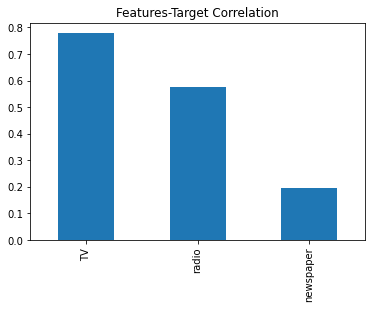

In [19]:
data.drop('sales',axis=1).corrwith(data['sales']).plot(kind='bar',title='Features-Target Correlation')

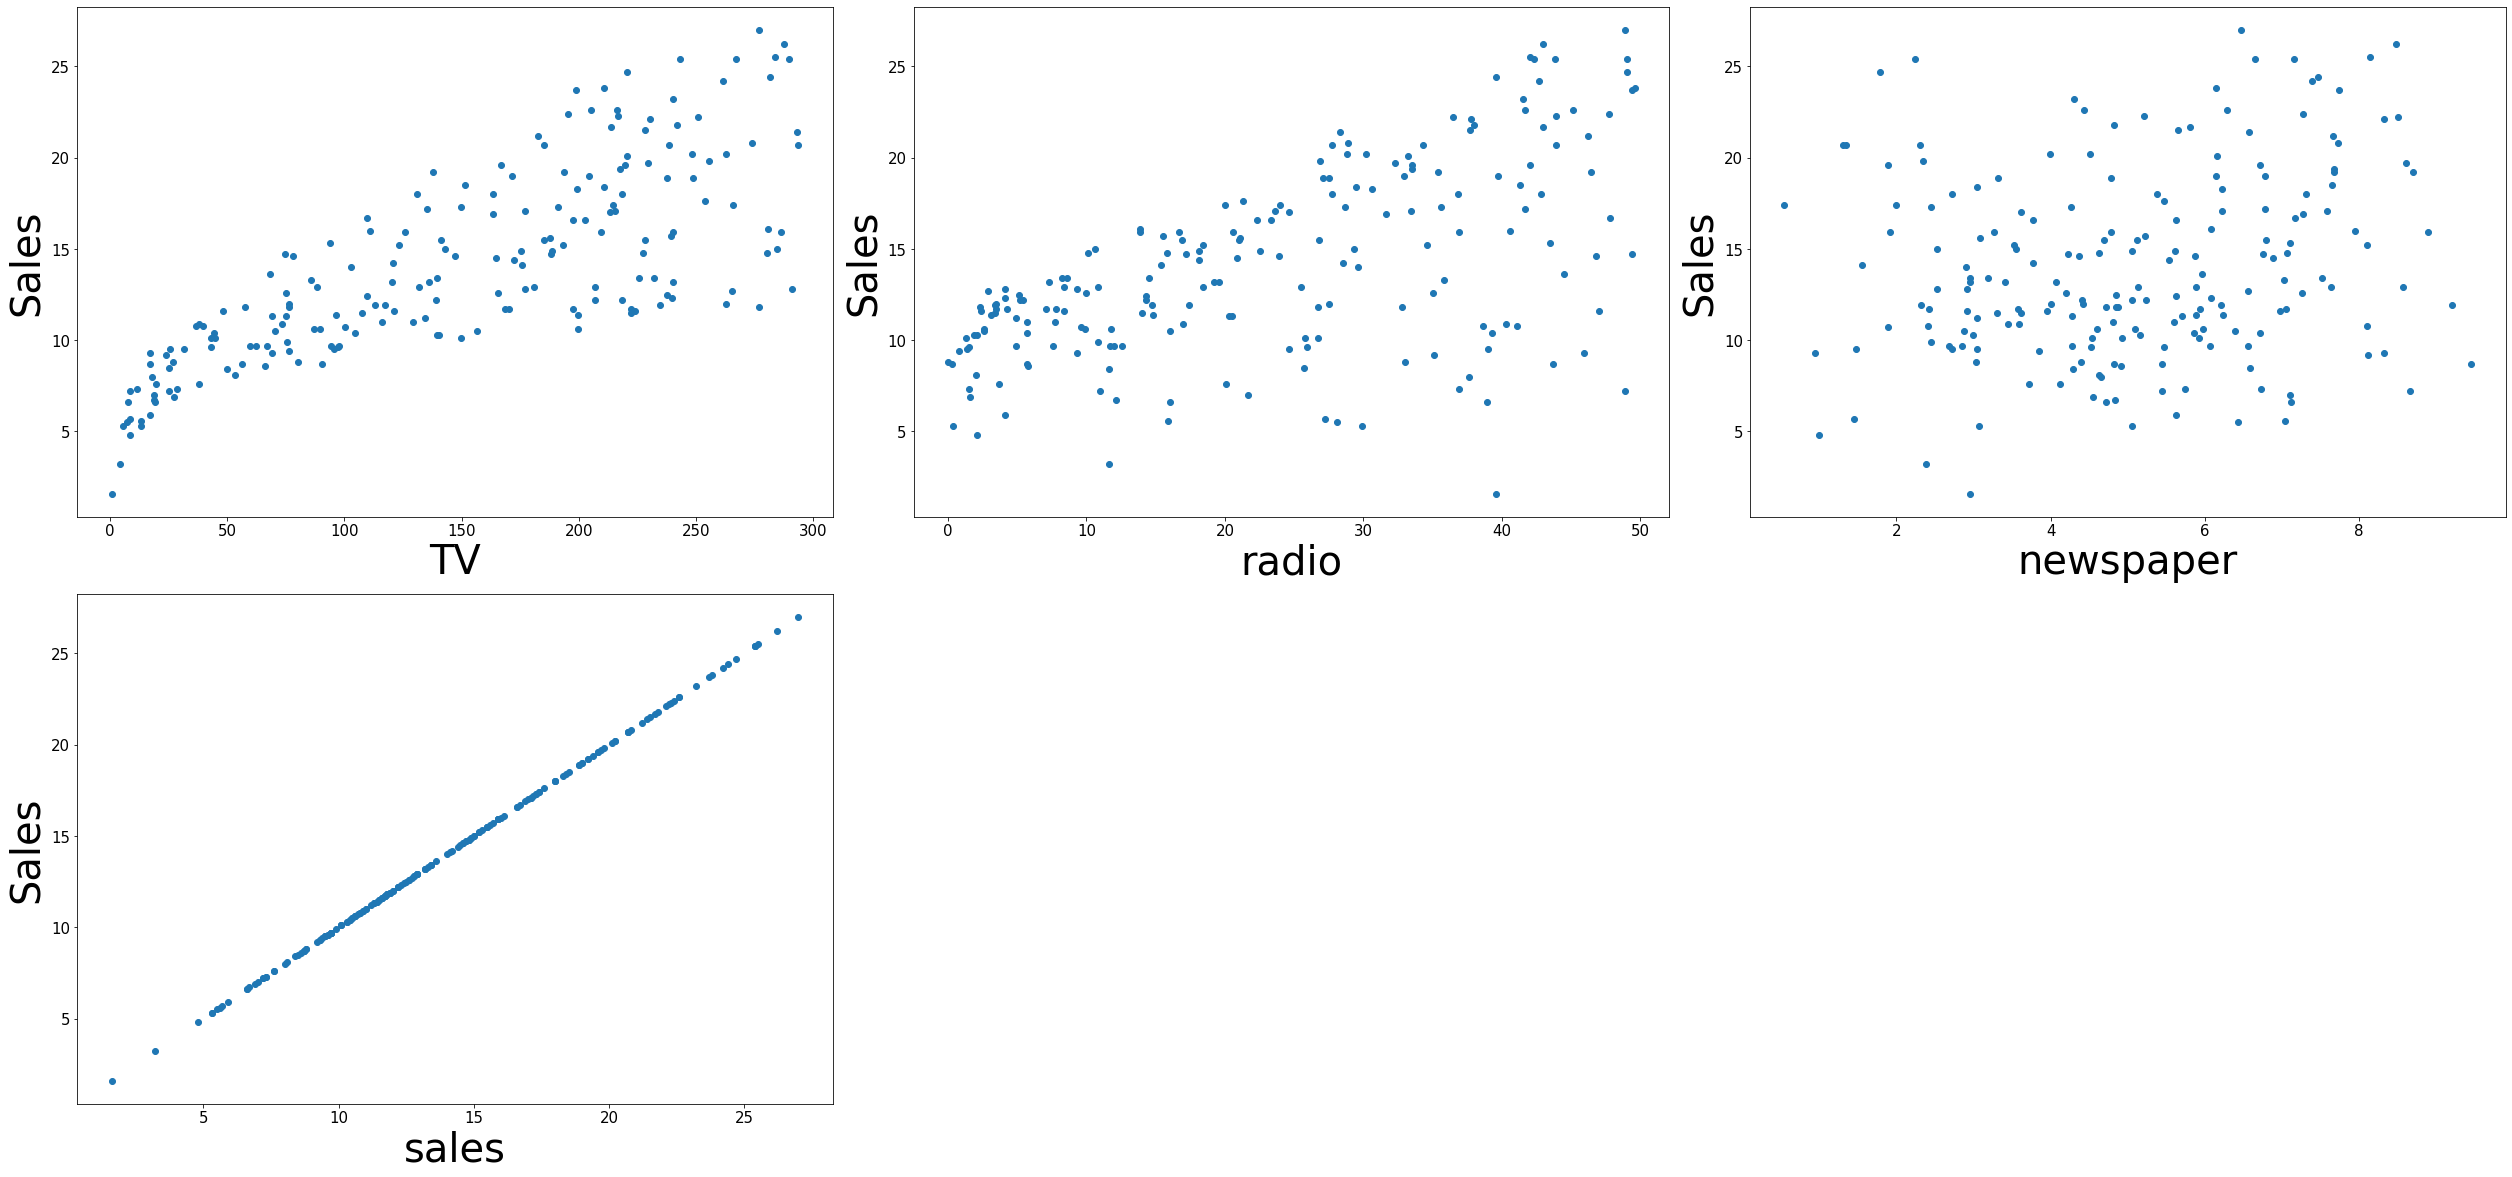

In [20]:
plt.figure(figsize=(35,40),facecolor='white')
plotnumber=1

parameters = {'ytick.labelsize': 15,
          'xtick.labelsize': 15}
plt.rcParams.update(parameters)


for column in data:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(data[column],data['sales'])
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Sales', fontsize=40)
    plotnumber+=1
plt.tight_layout()

- 'sales' shows strong linear relationship with 'TV' and 'radio', while shows weak relation with 'newspaper'.

### Seperating features and target

In [21]:
X=data.drop('sales',axis=1)
y=data['sales']

### Scaling the features

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## Splitting our data in to training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## Importing regression performance metrics

In [25]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

## Model 1: Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.score(X_test,y_test)

0.8973506561453755

In [29]:
y_lr=lr.predict(X_test)

In [30]:
lr_score=r2_score(y_test,y_lr)
lr_score

0.8973506561453755

In [31]:
lr_cvs=cross_val_score(lr,X,y,cv=5).mean()
lr_cvs

0.8857406146589945

## Model 2: SVR

In [32]:
from sklearn.svm import SVR
svr=SVR()

In [33]:
svr.fit(X_train,y_train)

SVR()

In [34]:
svr.score(X_test,y_test)

0.914574318459153

In [35]:
y_svr=svr.predict(X_test)

In [36]:
svr_score=r2_score(y_test,y_svr)
svr_score

0.914574318459153

In [37]:
svr_cvs=cross_val_score(svr,X,y,cv=5).mean()
svr_cvs

0.8351936374128008

## Model 3: KNN regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [39]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [40]:
knn.score(X_test,y_test)

0.9251892298446711

In [41]:
y_knn=knn.predict(X_test)

In [42]:
knn_score=r2_score(y_test,y_knn)
knn_score

0.9251892298446711

In [43]:
knn_cvs=cross_val_score(knn,X,y,cv=7).mean()
knn_cvs

0.955386297330467

## Model 4: ADA Boost Regerssor
    

In [44]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [45]:
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [46]:
abr.score(X_test,y_test)

0.9590884982740907

In [47]:
y_abr=abr.predict(X_test)

In [48]:
abr_score=r2_score(y_test,y_abr)
abr_score

0.9590884982740907

In [49]:
abr_cvs=cross_val_score(abr,X,y,cv=5).mean()
abr_cvs

0.9513356662936803

## Model 5: Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [51]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
rf.score(X_test,y_test)

0.9835945826620113

In [53]:
y_rf=rf.predict(X_test)

In [54]:
rf_score=r2_score(y_test,y_rf)
rf_score

0.9835945826620113

In [55]:
rf_cvs=cross_val_score(rf,X,y,cv=5).mean()
rf_cvs

0.9752365470803426

- **Based on cross validation scores, Random Forest is our best model for this dataset.**

## Hyperparameter tuning for best model

In [56]:
rf_grid={'criterion':['mse','mae'],
         'min_samples_split':[2,4,6,7],
         'min_samples_leaf':[1,2,3,4,5],
         'n_estimators':[60,80,100,120,140]}

In [57]:
from sklearn.model_selection import GridSearchCV
gridCV=GridSearchCV(rf,param_grid=rf_grid,n_jobs=-1)

In [58]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 7],
                         'n_estimators': [60, 80, 100, 120, 140]})

In [59]:
gridCV.best_params_

{'criterion': 'mae',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

In [60]:
rf_best=RandomForestRegressor(criterion='mae',min_samples_leaf=1,min_samples_split=2,n_estimators=120)

In [61]:
rf_best.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', n_estimators=120)

In [62]:
rf_best.score(X_test,y_test)

0.9858627462998942

In [63]:
y_best=rf_best.predict(X_test)

In [64]:
best_score=r2_score(y_test,y_best)
best_score

0.9858627462998942

In [65]:
cvs_best=cross_val_score(rf_best,X,y,cv=7).mean()
cvs_best

0.9781614966965694

## Saving the best model

In [66]:
import pickle
filename='Advertising_RF.pkl'
pickle.dump(rf_best,open(filename,'wb'))